In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
##Part- 01...read the dataset and do the train and test split

## This the Classification Problem
df=pd.read_csv("Churn_Modelling.csv")

In [8]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [14]:
## Independent and dependent features
X = df.drop(labels=["RowNumber","CustomerId","Surname","Exited"],axis=1)
Y = df[['Exited']]

In [15]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [17]:
Y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


In [18]:
#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [19]:
##Concatenate the dataframes
X=pd.concat([X,geography,gender],axis=1)

In [20]:
##Drop Unnecessary Columns
X=X.drop(['Geography','Gender'],axis=1)

In [21]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 28)

In [22]:
# Feature Scaling    ##Feature scaling is required in Deep learning because we create the neural network so if the scaling of the feature will be down then it would take very less time to form the neural network and during the backpropagation derivative of weight can be found very easily..
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [23]:
# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages

In [25]:
import keras                             ##It is the library used to create the neural network i.e used for the ANN
from keras.models import Sequential                                  ##A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor..It is the basically a libraray that is responsible to create any neural network
from keras.layers import Dense                                        ## it is used to create the layers
from keras.layers import LeakyReLU,PReLU,ELU                          ##These are the activation function
from keras.layers import Dropout                                      ##It is used to dropout/deactivate some of the neurons/nodes and activate some of the neurons out of all, so that there would be the less chance of overfitting


In [26]:
# Initialising the ANN
classifier = Sequential()

In [29]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer= 'he_uniform',activation='relu',input_dim = 11))        ##Adding 6 neurons in the first hidden layers and apply total 11 features in the input layer i.e total no. of nodes or neurons in the input layer is 11 and for the weight initiation use the he_init technique and use the "RELU" as the  activation function

# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu'))         ##Adding 6 neurons in the second hidden layer and activation function is relu and weight initiation as the he_uniform

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))   ##Adding 1 neuron in the output layer taking the activation function as the sigmoid and weight init as the glorot_uniform

In [31]:
# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])     ##Here we use the optimizer as the Adamax,,,,loss as the binary_crossentropy...for binary classfication problem use the loss as the binary_crossentropy and for multiclass classfication use categorical cross_entropy and since it is the classification problem use the metrics as the accuracy

In [36]:
# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, Y_train,validation_split=0.33, batch_size = 10, epochs = 100)      ##Fit the model to create the neural network taking the batch_size as the 10 and the nb_epoch as 100 means a batch of 10 features will pass 100 times i.e the number of  iteration would be 100

Epoch 1/100
536/536 [==============================] - 4s 4ms/step - loss: 0.6430 - accuracy: 0.6421 - val_loss: 0.5909 - val_accuracy: 0.7054
Epoch 2/100
536/536 [==============================] - 2s 3ms/step - loss: 0.5482 - accuracy: 0.7552 - val_loss: 0.5372 - val_accuracy: 0.7800
Epoch 3/100
536/536 [==============================] - 2s 3ms/step - loss: 0.5086 - accuracy: 0.7890 - val_loss: 0.5084 - val_accuracy: 0.7899
Epoch 4/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4854 - accuracy: 0.7936 - val_loss: 0.4910 - val_accuracy: 0.7917
Epoch 5/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4706 - accuracy: 0.7936 - val_loss: 0.4798 - val_accuracy: 0.7933
Epoch 6/100
536/536 [==============================] - 1s 3ms/step - loss: 0.4602 - accuracy: 0.7940 - val_loss: 0.4710 - val_accuracy: 0.7933
Epoch 7/100
536/536 [==============================] - 1s 3ms/step - loss: 0.4528 - accuracy: 0.7949 - val_loss: 0.4641 - val_accuracy: 0.7936

In [37]:
# list all data in history

print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


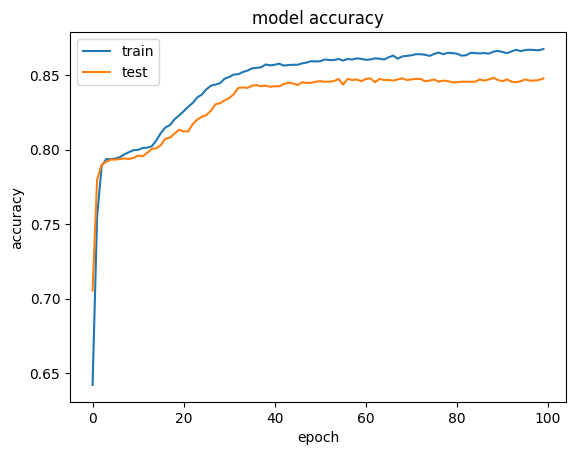

In [39]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

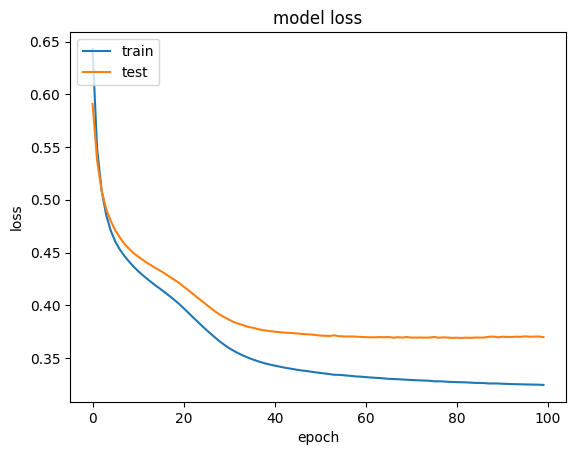

In [40]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [41]:
# Part 3 - Making the predictions and evaluating the model

In [64]:
# Predicting the Test set results by using the X_test
Y_pred = classifier.predict(X_test)
Y_pred = (Y_pred > 0.5)

63/63 [==============================] - 0s 1ms/step


In [45]:
# Making the Confusion Matrix by using the Y_pred and Y_test
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)

In [46]:
cm

array([[1527,   83],
       [ 216,  174]])

In [47]:
# Calculate the Accuracy using the Y_pred and Y_test
from sklearn.metrics import accuracy_score
score=accuracy_score(Y_pred,Y_test)

In [48]:
score

0.8505

In [49]:
###Do the Hyperparameter optimization for finding the best number of hidden layers, no.of neurons, choosing the activation function, batch size, number of epochs etc.

In [50]:
##Perform Hyperparameter Optimization

X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [51]:
Y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


In [52]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [53]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [57]:
from keras.wrappers.scikit_learn import KerasClassifier      ##Since,it is a classification problem so,we use the KerasClassifier
from sklearn.model_selection import GridSearchCV               ##Use the GridsearchCV for the Hyperparameter optimization

In [58]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, Flatten, LeakyReLU, BatchNormalization, Dropout
from keras.activations import relu, sigmoid

In [59]:
def create_model(layers, activation):
    model = Sequential()                                ##Use the sequential as the initializer and gives the input as the layers and activation
    for i, nodes in enumerate(layers):
        if i==0:
            model.add(Dense(nodes,input_dim=X_train.shape[1]))                         ##First provide the input dimesion to the first layer i.e input layer
            model.add(Activation(activation))                                           ##Then,provide the activation function
            model.add(Dropout(0.3))
        else:
            model.add(Dense(nodes))                                                         ##this is for the all hidden layers
            model.add(Activation(activation))
            model.add(Dropout(0.3))

    model.add(Dense(units = 1, kernel_initializer= 'glorot_uniform', activation = 'sigmoid')) # Note: no activation beyond this point

    model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
    return model

In [60]:
model = KerasClassifier(build_fn=create_model, verbose=0)


<ipython-input-60-7b0f05354f25>:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


In [61]:
layers = [[20], [40, 20], [45, 30, 15]]                 ## In first trial: one hidden layer with 20 neurons.....In 2nd trial two hidden layers with 40 and 20 neurons respectively...In third trial three hidden layers with 45, 30 and 15 hidden layers
activations = ['sigmoid', 'relu']                            ## Use the activation function as the Sigmoid and relu
param_grid = dict(layers=layers, activation=activations, batch_size = [128, 256], epochs=[30])             ## Take the batch size as 128 and 256 it will give the best value and epochs= 30
grid = GridSearchCV(estimator=model, param_grid=param_grid,cv=5)                                   ## apply the gridsearchcv and taking the cross validation as 5

In [62]:
grid_result = grid.fit(X_train, y_train)                                              ### Fit the model and create the neural network using the X_train and y_train

[grid_result.best_score_,grid_result.best_params_]                                          ### It gives the best score and best parameters...


[0.8543749928474427,
 {'activation': 'relu',
  'batch_size': 128,
  'epochs': 30,
  'layers': [45, 30, 15]}]

In [65]:
# Predicting the Test set results by using the X_test
y_pred = grid.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 [==============================] - 0s 3ms/step


In [66]:
# Making the Confusion Matrix by using the y_pred and y_test
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [67]:
cm

array([[1554,   41],
       [ 221,  184]])

In [68]:
# Calculate the Accuracy using the y_pred and Y_test
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [70]:
score*100

86.9